<h1>Data Visualization Project - Team 1</h1>
Team 1 Members <br>
- James Brannan <br>
- Allison Chase <br>
- John Hayes <br>
- Ellis McWriter <br>
- Matthew Sanders <br>

Dataset Used: https://data.cms.gov/provider-data/dataset/4pq5-n9py <br><br>
**Skilled Nursing Facility Provider Information** - "General information on currently active nursing homes, including number of certified beds, quality measure scores, staffing and other information used in the Five-Star Rating System. Data are presented as one row per nursing home.”

<h2>Preparing the Data Set</h2>

In [51]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
from pathlib import Path

# Idea to generate a random SNF to compare it to others in the category.
import random

In [52]:
url="https://data.cms.gov/provider-data/api/1/metastore/schemas/dataset/items/4pq5-n9py?show-reference-ids=false"

In [53]:
print(requests.get(url))

<Response [200]>


In [54]:
print(requests.get(url).json())

{'accessLevel': 'public', 'landingPage': 'https://data.cms.gov/provider-data/dataset/4pq5-n9py', 'bureauCode': ['009:38'], 'issued': '2023-08-01', '@type': 'dcat:Dataset', 'modified': '2024-04-01', 'released': '2024-04-24', 'keyword': [{'identifier': 'd03021cc-311c-5181-8eb6-7ccf7e76fc53', 'data': 'General Information'}, {'identifier': '203355e5-2454-505d-b356-08de15938ab9', 'data': 'Address'}, {'identifier': 'c59e48c7-3cc5-5a09-adec-a49493db72f6', 'data': 'Location'}, {'identifier': '70a212e5-bf1b-5cad-9ecd-150dab2bacf9', 'data': 'Ratings'}, {'identifier': '107b8826-e90b-5db3-ac30-ecdb99c73db6', 'data': 'Beds'}, {'identifier': '5692b1a6-1c82-55c4-9698-c7441733b985', 'data': 'Quality'}, {'identifier': 'a6f7b7c6-d26e-5f59-8a5b-c151bacb9907', 'data': 'Staffing'}, {'identifier': '35df7004-e437-5a8a-a96b-1bda5456ccca', 'data': 'Penalties'}], 'contactPoint': {'@type': 'vcard:Contact', 'fn': 'Nursing homes including rehab services', 'hasEmail': 'mailto:BetterCare@cms.hhs.gov'}, 'publisher': 

In [55]:
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "%modified": "2024-04-12T16:05:17-0400",
    "@type": "dcat:Dataset",
    "accessLevel": "public",
    "bureauCode": [
        "009:38"
    ],
    "contactPoint": {
        "@type": "vcard:Contact",
        "fn": "Nursing homes including rehab services",
        "hasEmail": "mailto:BetterCare@cms.hhs.gov"
    },
    "description": "General information on currently active nursing homes, including number of certified beds, quality measure scores, staffing and other information used in the Five-Star Rating System. Data are presented as one row per nursing home.",
    "distribution": [
        {
            "data": {
                "%Ref:downloadURL": [
                    {
                        "data": {
                            "checksum": null,
                            "filePath": "s3://pdc-s3-nhc-data/NH_ProviderInfo_Apr2024.csv",
                            "identifier": "5eba4f43478aeb4d0ab8d071e1e4655d",
                            "mimeType": "text/csv",
           

In [56]:
response = requests.get(url).json()
print(json.dumps(response["distribution"][0]["data"]["downloadURL"], indent=4, sort_keys=True))

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [57]:
nursinghomedataURL = json.dumps(response["distribution"][0]["data"]['downloadURL'], indent=4, sort_keys=True)
print(nursinghomedataURL)

"https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv"


In [58]:
cleaned_string = nursinghomedataURL.replace('"', ' ').strip()

In [59]:
cleaned_string

'https://data.cms.gov/provider-data/sites/default/files/resources/5eba4f43478aeb4d0ab8d071e1e4655d_1712952317/NH_ProviderInfo_Apr2024.csv'

In [60]:
# Define the full path to your Resources folder and the desired filename
path = Path("Resources")
filename = "NH_ProviderInfo_Apr2024.csv"

# Combine the path to the Resources folder with the desired filename
file_path = path / filename

# Ensure the directory exists (since it already should), but this will prevent errors
path.mkdir(parents=True, exist_ok=True)

# Download the file
response = requests.get(cleaned_string)
response.raise_for_status()  # Ensure that the download was successful

# Save the file
with open(file_path, 'wb') as file:
    file.write(response.content)

# Print the full file path where the file is saved
print(f"File successfully saved at {file_path}")

File successfully saved at Resources/NH_ProviderInfo_Apr2024.csv


In [61]:
# pd.read_csv(nursinghomedataURL).sample(5)
nursinghomedata=pd.read_csv(cleaned_string)
nursinghomedata.sample(5)

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
1170,056379,OXNARD MANOR HEALTHCARE CENTER,1400 W GONZALES RD,OXNARD,CA,93030,8059830324,660,Ventura,For profit - Individual,...,4.0,0,0.00,0,0,"1400 W GONZALES RD,OXNARD,CA,93030",34.2192,-119.190,NaN,2024-04-01
913,055845,LEISURE GLEN POST ACUTE CARE CENTER,330 MISSION ROAD,GLENDALE,CA,91205,8182474476,200,Los Angeles,For profit - Corporation,...,1.0,1,9750.00,0,1,"330 MISSION ROAD,GLENDALE,CA,91205",34.1271,-118.252,NaN,2024-04-01
14160,675554,GRACE CARE CENTER OF NOCONA,306 CAROLYN RD,NOCONA,TX,76255,9408253288,800,Montague,For profit - Individual,...,3.0,2,42302.16,0,2,"306 CAROLYN RD,NOCONA,TX,76255",33.7793,-97.732,NaN,2024-04-01
3743,155330,SALEM CROSSING,200 CONNIE AVE,SALEM,IN,47167,8128831877,870,Washington,Non profit - Corporation,...,0.0,0,0.00,0,0,"200 CONNIE AVE,SALEM,IN,47167",38.6152,-86.109,NaN,2024-04-01
13038,525172,JEWISH HOME AND CARE CENTER,1414 N PROSPECT AVE,MILWAUKEE,WI,53202,4142762627,390,Milwaukee,For profit - Corporation,...,0.0,0,0.00,0,0,"1414 N PROSPECT AVE,MILWAUKEE,WI,53202",43.0483,-87.895,NaN,2024-04-01


In [62]:
# Drop columns that are not needed
nursinghomedataREDUCED=nursinghomedata.drop(columns=['Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating',
                                                    'Short-Stay QM Rating',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Long-Stay QM Rating Footnote',
                                                    'Number of administrators who have left the nursing home',
                                                    'Average Number of Residents per Day Footnote',
                                                    'Provider Type',
                                                    'Number of Citations from Infection Control Inspections',
                                                    'Provider Resides in Hospital',
                                                    'Special Focus Status',
                                                    'Automatic Sprinkler Systems in All Required Areas',
                                                    'Overall Rating Footnote',
                                                    'Health Inspection Rating Footnote',
                                                    'QM Rating Footnote',
                                                    'Short-Stay QM Rating Footnote',
                                                    'Geocoding Footnote',
                                                    'Processing Date',
                                                    'Provider SSA County Code',
                                                    'Staffing Rating Footnote',
                                                    'Reported Staffing Footnote',
                                                    'Physical Therapist Staffing Footnote',
                                                    'Total nursing staff turnover footnote',
                                                    'Registered Nurse turnover footnote',
                                                    'Administrator turnover footnote',
                                                    'Telephone Number',
                                                    'ZIP Code',
                                                    'County/Parish',
                                                    'Legal Business Name',
                                                    'Continuing Care Retirement Community',
                                                    'Abuse Icon',
                                                    'Affiliated Entity Name', 
                                                    'Affiliated Entity ID',
                                                    'Provider Changed Ownership in Last 12 Months',
                                                    'Most Recent Health Inspection More Than 2 Years Ago',
                                                    'Provider Resides in Hospital',
                                                    'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
                                                    'Case-Mix LPN Staffing Hours per Resident per Day',
                                                    'Case-Mix RN Staffing Hours per Resident per Day',
                                                    'Case-Mix Total Nurse Staffing Hours per Resident per Day',
                                                    'Provider Address',
                                                    'City/Town',
                                                    'Date First Approved to Provide Medicare and Medicaid Services',
                                                    'Provider Name',
                                                    'With a Resident and Family Council',
                                             ])   

# nursinghomedataREDUCED.sample(25)

In [63]:
# nursinghomedataREDUCED.columns

In [64]:
# Removing off states, like Guam
exclude_states = ['GU', 'DC', 'PR']
statetrimedNHD = nursinghomedataREDUCED[~nursinghomedataREDUCED['State'].isin(exclude_states)]

# Sort Nursing Data by perferred columns. 
state_ratings_mean = statetrimedNHD.groupby('State')['Overall Rating'].mean()
state_ratings_mean = state_ratings_mean.sort_values(ascending=False)

<h2>Exploring Data: Average Nursing Home Ratings by State</h2>

In [65]:
# Getting Specific Data Columns for XX State
HawaiiData = nursinghomedataREDUCED.loc[nursinghomedata['State'] == ("HI")]
HawaiiData

,CMS Certification Number (CCN),State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude
2777,125002,HI,Government - State,40,44.9,5.0,4.0,5.0,5.0,2.91255,...,44.667,1,0,2,23782.50,0,2,"1190 WAIANUENUE AVENUE,HILO,HI,96720",19.7175,-155.113
2778,125003,HI,Non profit - Corporation,105,94.8,4.0,3.0,5.0,4.0,3.29870,...,54.000,1,4,0,0.00,0,0,"100 KEOKEA PLACE,KULA,HI,96790",20.7018,-156.357
2779,125004,HI,For profit - Limited Liability company,110,69.0,4.0,3.0,4.0,5.0,1.99803,...,61.333,4,2,0,0.00,0,0,"3-3420 KUHIO HIGHWAY, SUITE 300,LIHUE,HI,96766",21.9789,-159.367
2780,125007,HI,Non profit - Corporation,252,214.5,2.0,1.0,5.0,5.0,2.56239,...,220.833,8,7,5,233142.14,0,5,"472 KAULANA STREET,KAHULUI,HI,96732",20.8792,-156.476
2781,125009,HI,Government - State,158,75.8,5.0,5.0,4.0,4.0,2.53511,...,38.667,0,0,0,0.00,0,0,"1027 HALA DRIVE,HONOLULU,HI,96817",21.3297,-157.861
2782,125010,HI,Government - State,155,103.9,5.0,3.0,5.0,5.0,2.28286,...,67.333,1,3,1,55900.00,0,1,"3675 KILAUEA AVENUE,HONOLULU,HI,96816",21.2736,-157.801
2783,125011,HI,For profit - Limited Liability company,288,268.9,4.0,3.0,5.0,3.0,3.07637,...,92.667,2,3,1,11537.50,0,1,"1677 PENSACOLA STREET,HONOLULU,HI,96822",21.3086,-157.840
2784,125013,HI,Non profit - Other,100,86.3,5.0,5.0,5.0,5.0,3.02700,...,38.667,0,0,0,0.00,0,0,"5113 MAUNALANI CIRCLE,HONOLULU,HI,96816",21.2979,-157.788
2785,125014,HI,Non profit - Corporation,91,74.6,5.0,3.0,5.0,5.0,2.99464,...,88.333,1,0,2,33663.50,0,2,"1434 PUNAHOU STREET,HONOLULU,HI,96822",21.3015,-157.833
2786,125019,HI,For profit - Corporation,182,173.0,2.0,2.0,4.0,2.0,2.58181,...,110.333,0,16,4,35188.44,2,6,"1900 BACHELOT STREET,HONOLULU,HI,96817",21.3234,-157.855


In [66]:
# Removing non-states: Guam; Washington, D.C.; and Puerto Rico
exclude_states = ['GU', 'DC', 'PR']
statetrimedNHD = nursinghomedataREDUCED[~nursinghomedataREDUCED['State'].isin(exclude_states)]

# Sort Nursing Data by perferred columns. 
state_ratings_mean = statetrimedNHD.groupby('State')['Overall Rating'].mean()
state_ratings_mean = state_ratings_mean.sort_values(ascending=False)

In [67]:
sortedNHD= statetrimedNHD.groupby("State")
sortedNHD.head()

,CMS Certification Number (CCN),State,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,...,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude
0,015009,AL,For profit - Corporation,57,51.2,2.0,2.0,4.0,3.0,2.54923,...,31.333,2,0,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736
1,015010,AL,For profit - Corporation,85,80.4,4.0,4.0,3.0,3.0,2.59139,...,6.667,0,0,0,0.00,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254
2,015012,AL,Government - County,50,40.5,4.0,4.0,2.0,4.0,3.50215,...,13.333,0,0,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",34.6611,-86.047
3,015014,AL,For profit - Individual,92,75.9,3.0,3.0,4.0,2.0,1.85428,...,20.667,0,0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",33.5595,-86.722
4,015015,AL,For profit - Individual,103,85.5,2.0,2.0,3.0,4.0,2.21479,...,26.667,0,1,1,975.00,0,1,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",33.3221,-87.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13352,535013,WY,For profit - Limited Liability company,146,87.6,1.0,2.0,3.0,1.0,1.67909,...,55.333,0,11,4,26048.75,0,4,"3128 BOXELDER DRIVE,CHEYENNE,WY,82001",41.1391,-104.777
13353,535017,WY,Non profit - Corporation,50,36.9,5.0,4.0,5.0,4.0,2.23379,...,22.667,2,0,2,4565.60,0,2,"333 N BRIDGER AVE,PINEDALE,WY,82941",42.8697,-109.857
13354,535021,WY,Government - State,90,81.3,3.0,3.0,2.0,4.0,2.65335,...,27.333,1,0,1,7442.50,0,1,"890 US HWY 20 SOUTH,BASIN,WY,82410",44.3602,-108.039
13355,535022,WY,Government - Hospital district,160,105.8,2.0,2.0,3.0,4.0,2.93497,...,44.000,0,10,0,0.00,0,0,"1000 S DOUGLAS HWY,GILLETTE,WY,82716",44.2834,-105.494


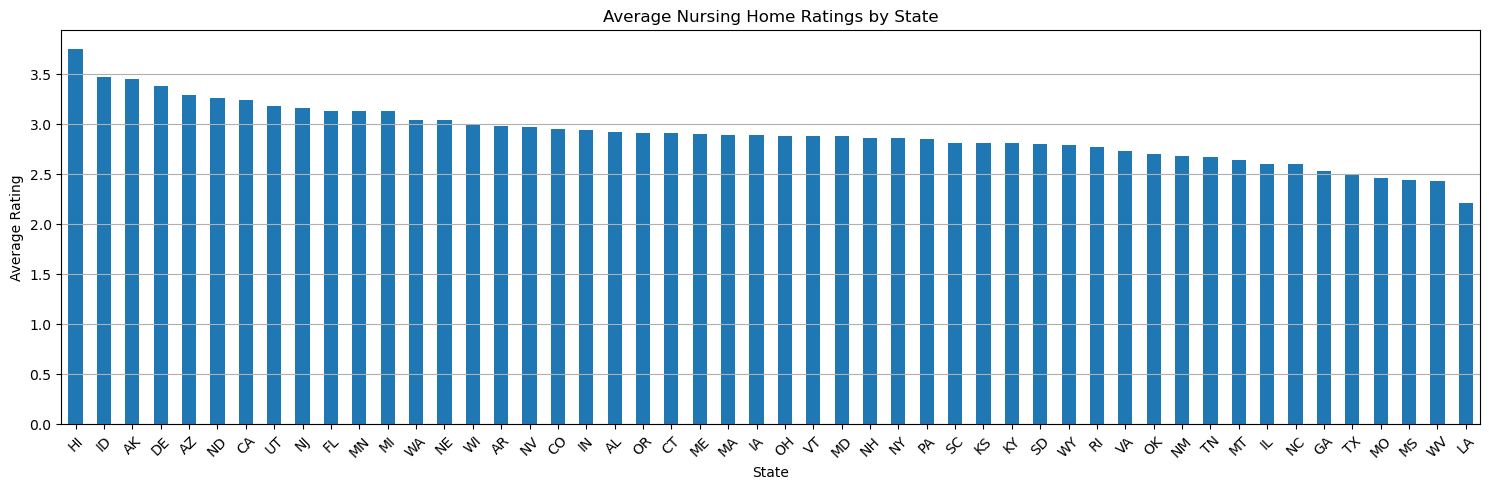

Bar chart successfully saved to Images/State_Ratings_Mean.png


In [68]:

# Define the path for saving the image
images_folder = Path("Images")
images_folder.mkdir(parents=True, exist_ok=True)  # Ensure the directory exists
save_path = images_folder / "State_Ratings_Mean.png"

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data on the axes object
state_ratings_mean.plot(kind='bar', ax=ax)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Average Rating')
ax.set_title('Average Nursing Home Ratings by State')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Save the figure using the fig object directly
fig.savefig(save_path)

# Display the plot
plt.show()

print(f"Bar chart successfully saved to {save_path}")

<h2>Exploring Data: How does the staffing levels of nursing homes relate to their Five-Star Rating System scores?</h2>

<h2>Exploring Data: Ownership Type - Relationships</h2>

In [69]:
# Calculate the number of fines for each 'Ownership Type'
fines_by_ownership = nursinghomedata.groupby('Ownership Type')['Number of Fines'].count()

print(fines_by_ownership)

Ownership Type
For profit - Corporation                  6074
For profit - Individual                    763
For profit - Limited Liability company    3350
For profit - Partnership                   553
Government - City                           57
Government - City/county                    61
Government - County                        368
Government - Federal                        22
Government - Hospital district             266
Government - State                         158
Non profit - Church related                331
Non profit - Corporation                  2545
Non profit - Other                         312
Name: Number of Fines, dtype: int64


In [70]:
# Calculate the average number fines each 'Ownership Type'
fines_by_ownership = nursinghomedata.groupby('Ownership Type')['Number of Fines'].mean()

print(fines_by_ownership)

Ownership Type
For profit - Corporation                  2.137142
For profit - Individual                   2.487549
For profit - Limited Liability company    2.617910
For profit - Partnership                  2.566004
Government - City                         2.473684
Government - City/county                  1.672131
Government - County                       1.880435
Government - Federal                      1.954545
Government - Hospital district            2.469925
Government - State                        1.708861
Non profit - Church related               1.830816
Non profit - Corporation                  1.696267
Non profit - Other                        2.166667
Name: Number of Fines, dtype: float64


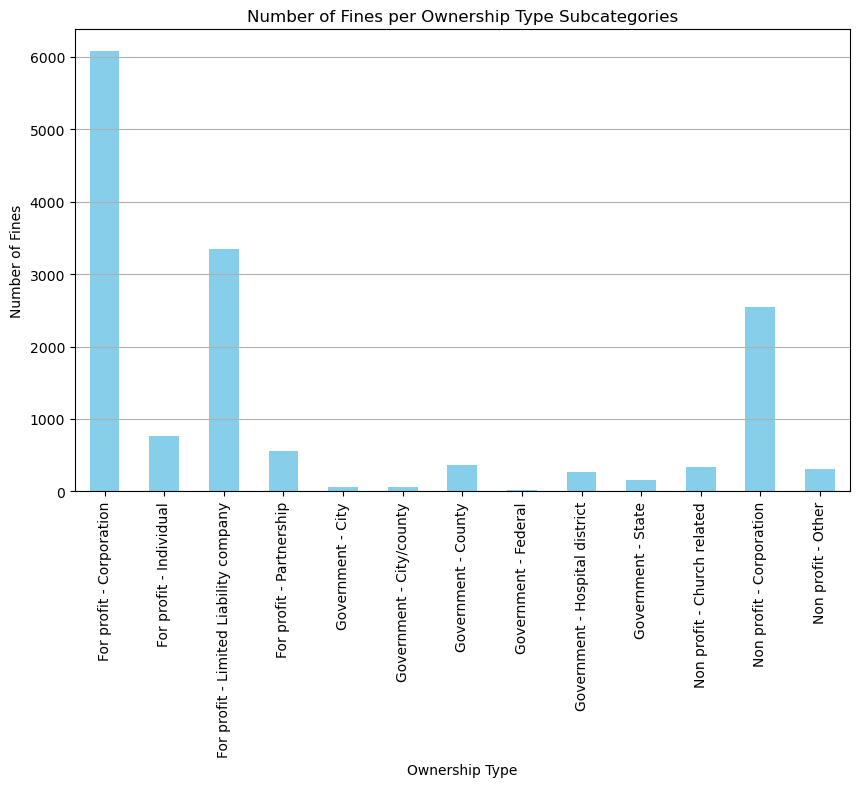

In [71]:
# Calculate the number of fines based on the 'Ownership Type' column
fines_by_ownership = nursinghomedata.groupby('Ownership Type')['Number of Fines'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
fines_by_ownership.plot(kind='bar', color='skyblue')
plt.xlabel('Ownership Type')
plt.ylabel('Number of Fines')
plt.title('Number of Fines per Ownership Type Subcategories')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


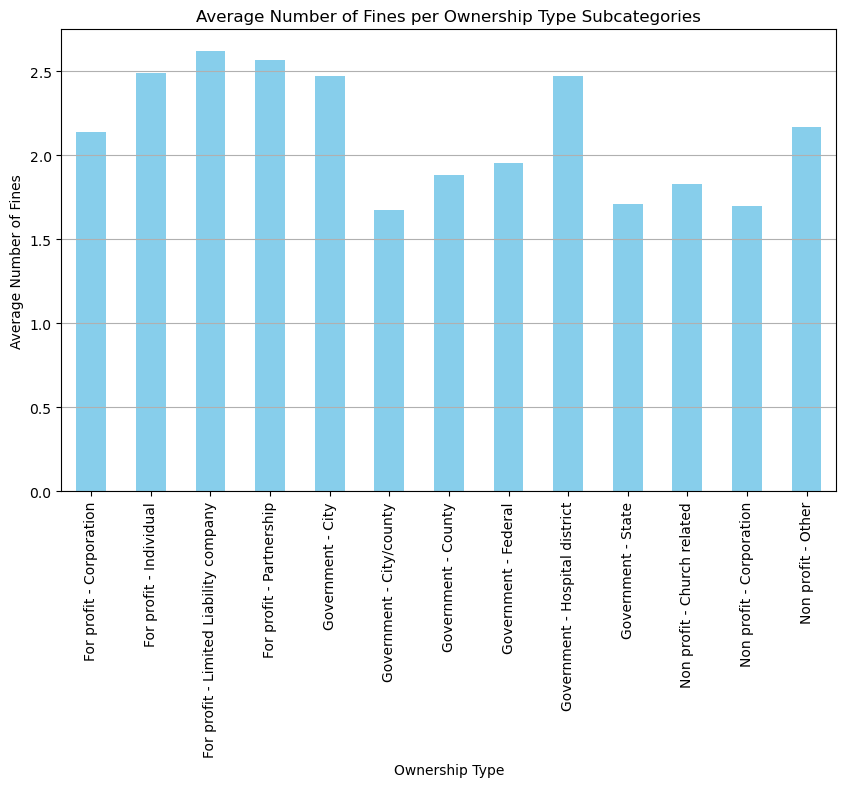

In [72]:
# Calculate the number of fines based on the 'Ownership Type' column
fines_by_ownership = nursinghomedata.groupby('Ownership Type')['Number of Fines'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
fines_by_ownership.plot(kind='bar', color='skyblue')
plt.xlabel('Ownership Type')
plt.ylabel('Average Number of Fines')
plt.title('Average Number of Fines per Ownership Type Subcategories')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

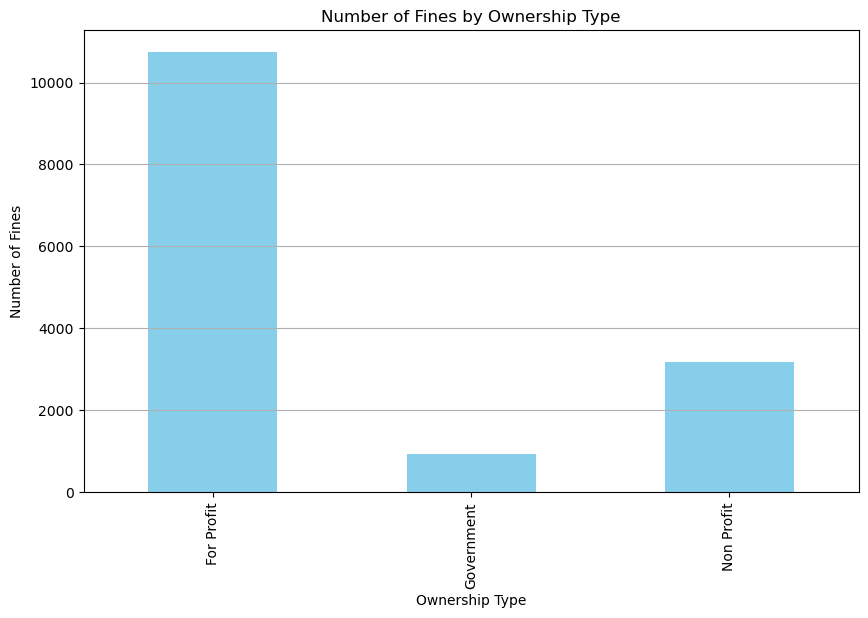

In [73]:
# Create a new column to categorize the subcategories into main categories
nursinghomedata['Main Category'] = nursinghomedata['Ownership Type'].replace({
    'For profit - Corporation': 'For Profit',
    'Government - County': 'Government',
    'For profit - Individual': 'For Profit',
    'For profit - Limited Liability company': 'For Profit',
    'Non profit - Corporation': 'Non Profit',
    'Non profit - Other': 'Non Profit',
    'For profit - Partnership': 'For Profit',
    'Government - City': 'Government',
    'Non profit - Church related': 'Non Profit',
    'Government - City/county': 'Government',
    'Government - Federal': 'Government',
    'Government - State': 'Government',
    'Government - Hospital district': 'Government'
})

# Group the data based on the new main category
grouped_data = nursinghomedata.groupby('Main Category')['Number of Fines'].count()

# Create a bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Ownership Type')
plt.ylabel('Number of Fines')
plt.title('Number of Fines by Ownership Type')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

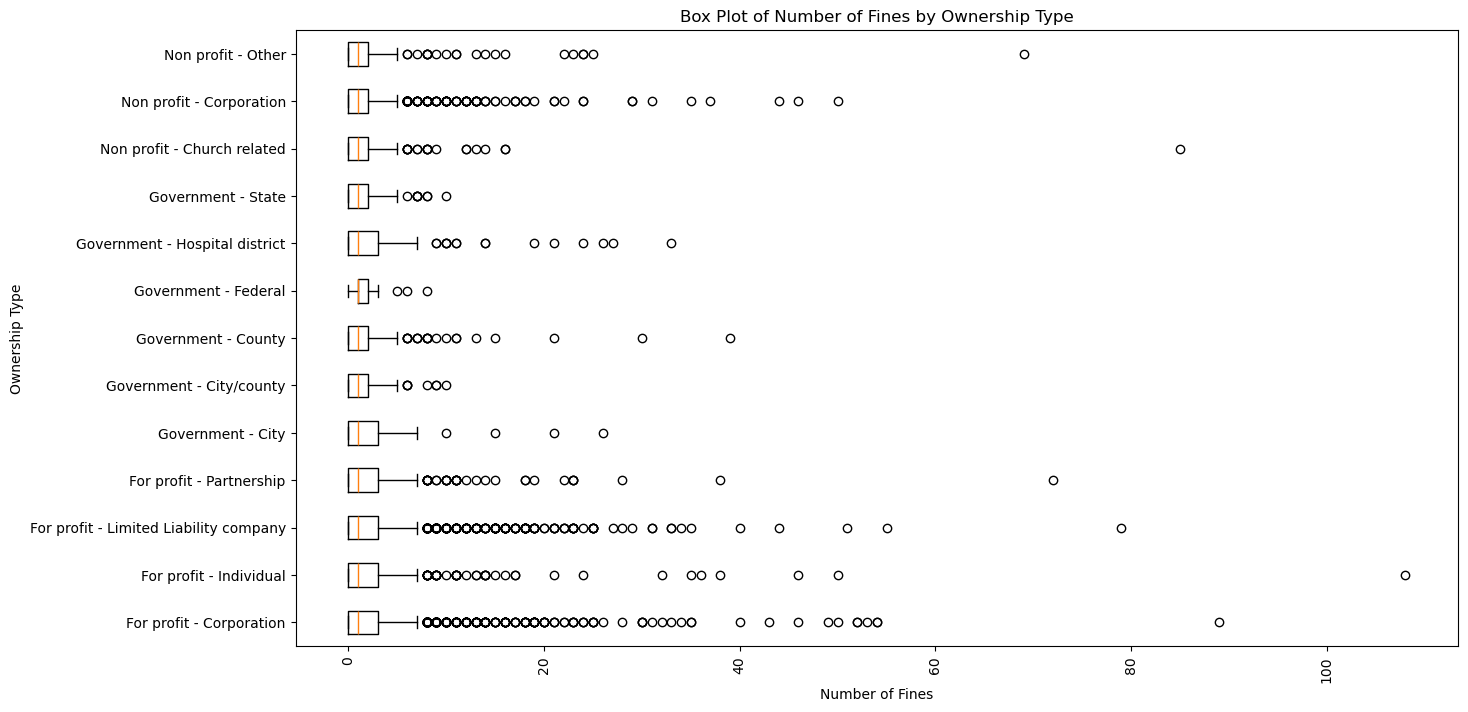

In [74]:
grouped_data = nursinghomedata.groupby('Ownership Type')['Number of Fines']

# Create a box plot for each ownership type group
plt.figure(figsize=(15,8))
plt.boxplot([group.values for name, group in grouped_data], labels=[name for name, group in grouped_data], vert=False)
plt.ylabel('Ownership Type')
plt.xlabel('Number of Fines')
plt.title('Box Plot of Number of Fines by Ownership Type')
plt.xticks(rotation=90)
plt.show()

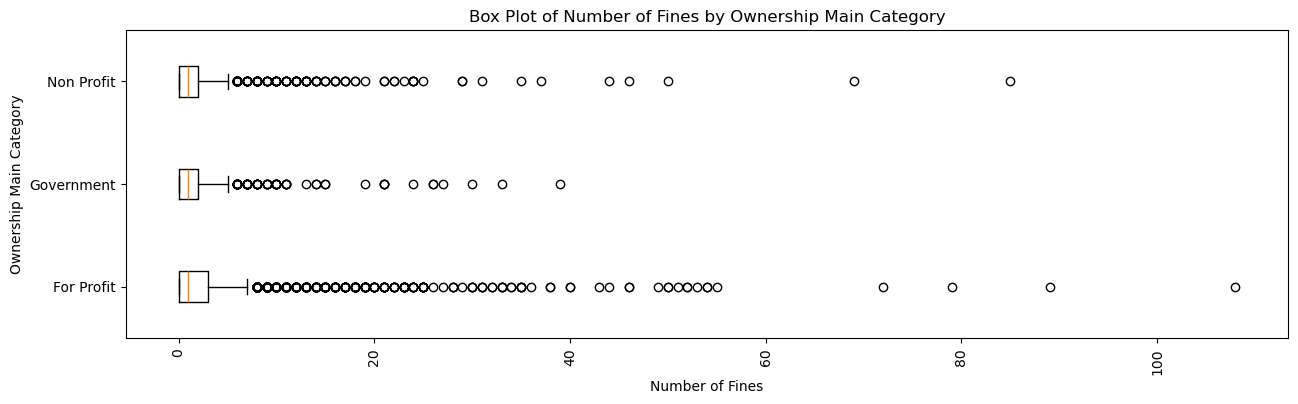

In [75]:
# Create a new column to categorize the subcategories into main categories
nursinghomedata['Main Category'] = nursinghomedata['Ownership Type'].replace({
    'For profit - Corporation': 'For Profit',
    'Government - County': 'Government',
    'For profit - Individual': 'For Profit',
    'For profit - Limited Liability company': 'For Profit',
    'Non profit - Corporation': 'Non Profit',
    'Non profit - Other': 'Non Profit',
    'For profit - Partnership': 'For Profit',
    'Government - City': 'Government',
    'Non profit - Church related': 'Non Profit',
    'Government - City/county': 'Government',
    'Government - Federal': 'Government',
    'Government - State': 'Government',
    'Government - Hospital district': 'Government'
})

# Group the data based on the new main category
grouped_data = nursinghomedata.groupby('Main Category')['Number of Fines']

# Create a box plot for each main category group
plt.figure(figsize=(15,4))
plt.boxplot([group.values for name, group in grouped_data], labels=[name for name, group in grouped_data], vert=False)

plt.xlabel('Number of Fines')
plt.ylabel('Ownership Main Category')
plt.title('Box Plot of Number of Fines by Ownership Main Category')
plt.xticks(rotation=90)

plt.show()

<h2>Exploring Data: What outliers are there in Number of Residents Per Day</h2>

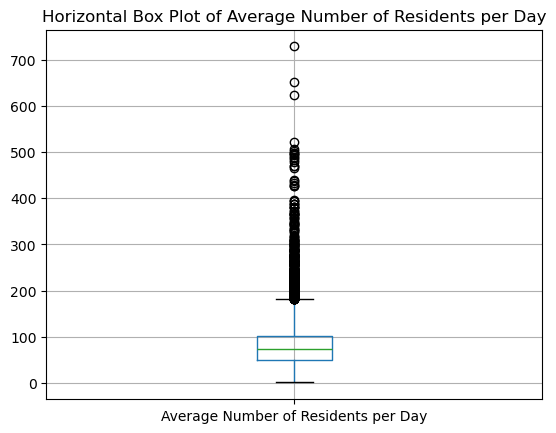

In [76]:
# Create a horizontal box plot
boxplot = nursinghomedata.boxplot(column=['Average Number of Residents per Day'], return_type='axes',)

# Customize the plot
boxplot.set_xlabel('')
boxplot.set_title('Horizontal Box Plot of Average Number of Residents per Day')

plt.show()

In [77]:
nursinghomedata['Average Number of Residents per Day'].describe()

count    14790.000000
mean        81.553482
std         48.347764
min          1.000000
25%         49.400000
50%         74.100000
75%        102.075000
max        728.500000
Name: Average Number of Residents per Day, dtype: float64

In [78]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = nursinghomedata['Average Number of Residents per Day'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Average Number of Residents per Day is: {lowerq}")
print(f"The upper quartile of Average Number of Residents per Day is: {upperq}")
print(f"The interquartile range of Average Number of Residents per Day is: {iqr}")
print(f"The the median of Average Number of Residents per Day is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Average Number of Residents per Day is: 49.4
The upper quartile of Average Number of Residents per Day is: 102.07499999999999
The interquartile range of Average Number of Residents per Day is: 52.67499999999999
The the median of Average Number of Residents per Day is: 74.1 
Values below -29.61249999999999 could be outliers.
Values above 181.08749999999998 could be outliers.


In [79]:
# Count the number of cells with a value greater than 200 in the 'Average Number of Residents per Day' column
count_greater_than_182 = (nursinghomedata['Average Number of Residents per Day'] > 182).sum()

print("Number of cells with a value greater than 182:", count_greater_than_182)

Number of cells with a value greater than 182: 483


<h2>Exploring Data: Regression and Correlation</h2>

The r value is: nan


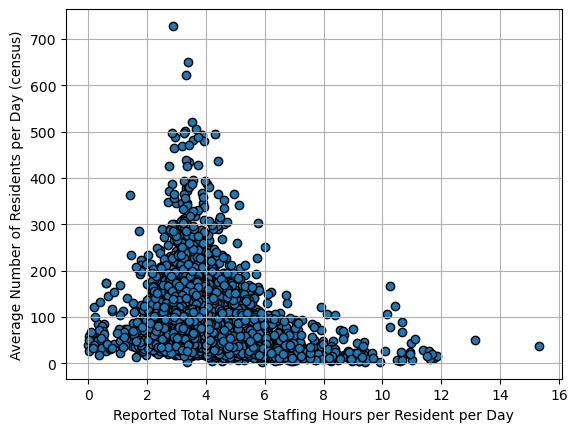

In [84]:
x_values = nursinghomedataREDUCED['Reported Total Nurse Staffing Hours per Resident per Day']
y_values = nursinghomedataREDUCED['Average Number of Residents per Day']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.ylabel("Average Number of Residents per Day (census)")
plt.xlabel("Reported Total Nurse Staffing Hours per Resident per Day")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (400, 100), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

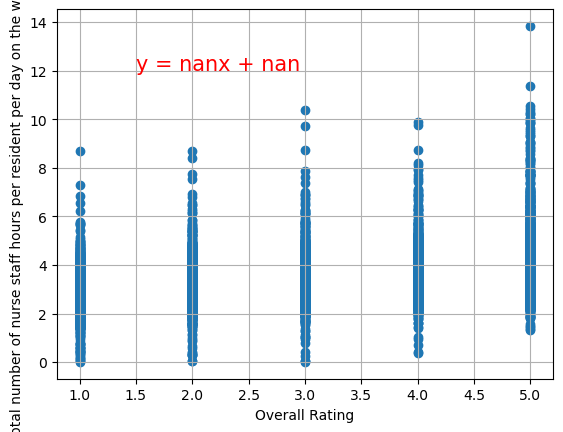

The r value is: nan


In [85]:
y_values = nursinghomedataREDUCED['Total number of nurse staff hours per resident per day on the weekend']
x_values = nursinghomedataREDUCED['Overall Rating']
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.xlabel('Overall Rating')
plt.ylabel('Total number of nurse staff hours per resident per day on the weekend')

plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (1.5, 12), fontsize=15, color="red")
plt.show()


print(f"The r value is: {rvalue}")

plt.show()

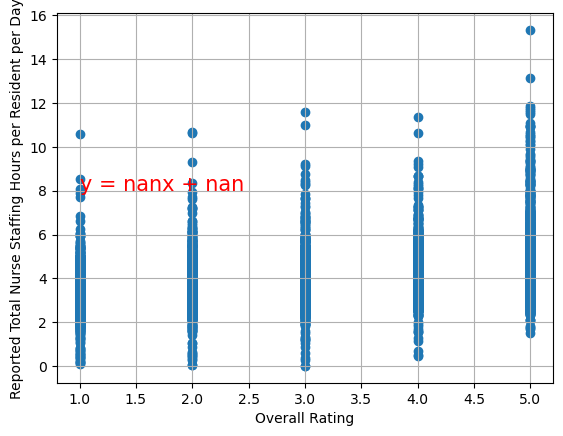

The r value is: nan


In [86]:
y_values = nursinghomedataREDUCED['Reported Total Nurse Staffing Hours per Resident per Day']
x_values = nursinghomedataREDUCED['Overall Rating']
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.xlabel('Overall Rating')
plt.ylabel('Reported Total Nurse Staffing Hours per Resident per Day')

plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (1, 8), fontsize=15, color="red")
plt.show()


print(f"The r value is: {rvalue}")

plt.show()

In [ ]:
# Need to drop NAs to get regression line!
# reduced_nursinghomedata_dropped[["Reported Total Nurse Staffing Hours per Resident per Day","Total number of nurse staff hours per resident per day on the weekend"]].describe()

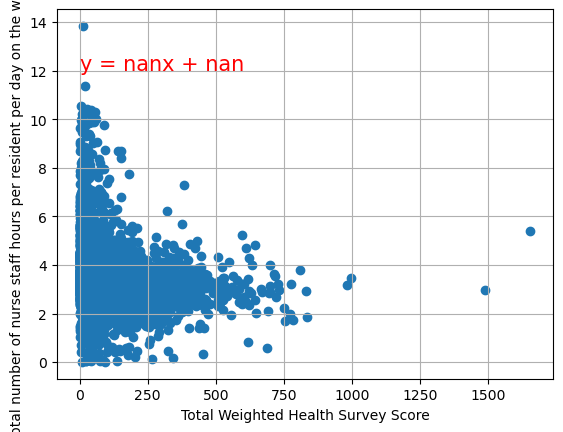

The r value is: nan


In [87]:
y_values = nursinghomedataREDUCED['Total number of nurse staff hours per resident per day on the weekend']
x_values = nursinghomedataREDUCED['Total Weighted Health Survey Score']
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))

plt.xlabel('Total Weighted Health Survey Score')
plt.ylabel('Total number of nurse staff hours per resident per day on the weekend')

plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (1.5, 12), fontsize=15, color="red")
plt.show()


print(f"The r value is: {rvalue}")

plt.show()